<div style="background-color: #080930; color: #ffff; padding: 15px; border-radius: 15px; text-align:center">
  <h2>Función de suavizado</h2>
</div>  

# FUNCIÓN

## Importar librerías

In [3]:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
from obspy import read
import numpy as np
import obspy as op
import matplotlib.pyplot as plt
from scipy.signal import convolve

## Definir función

In [4]:
import numpy as np
from scipy.signal import convolve

def suavizado_espectro(traza, ventana_segundos):
    datos = traza.data
    frecuencia_muestreo = traza.stats.sampling_rate

    valores_fft = np.fft.rfft(datos)
    frecuencias = np.fft.rfftfreq(len(datos), d=1.0/frecuencia_muestreo)

    espectro_amplitud = np.abs(valores_fft)

    muestras_ventana = int(ventana_segundos * frecuencia_muestreo)
    if muestras_ventana < 1:
        muestras_ventana = 1  # Evitar problemas con ventanas muy pequeñas

    kernel = np.ones(muestras_ventana) / muestras_ventana
    espectro_suavizado = convolve(espectro_amplitud, kernel, mode='same')

    valores_fft_suavizado = valores_fft * (espectro_suavizado / (espectro_amplitud + 1e-10))
    datos_suavizados = np.fft.irfft(valores_fft_suavizado, n=len(datos))

    traza_suavizada = traza.copy()
    traza_suavizada.data = datos_suavizados

    return traza_suavizada, frecuencias, espectro_amplitud, espectro_suavizado

## Graficar espectros

In [5]:
def graficar_espectros(frecuencias, espectro_amplitud, espectro_suavizado):
    plt.figure(figsize=(10, 6))
    plt.plot(frecuencias, espectro_amplitud, label="Espectro de Amplitud Original")
    plt.plot(frecuencias, espectro_suavizado, label="Espectro de Amplitud Suavizado", linestyle='--')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Amplitud')
    plt.legend()
    plt.title('Comparación de Espectros de Amplitud')
    plt.show()

## Graficar trazas

In [6]:
def graficar_trazas(traza, traza_suavizada):
    plt.figure(figsize=(10, 6))
    plt.plot(traza.times(), traza.data, label="Traza Original")
    plt.plot(traza_suavizada.times(), traza_suavizada.data, label="Traza Suavizada", linestyle='--')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.legend()
    plt.title('Comparación de Trazas')
    plt.show()

## Aplicar función a onda generada aleatoriamente

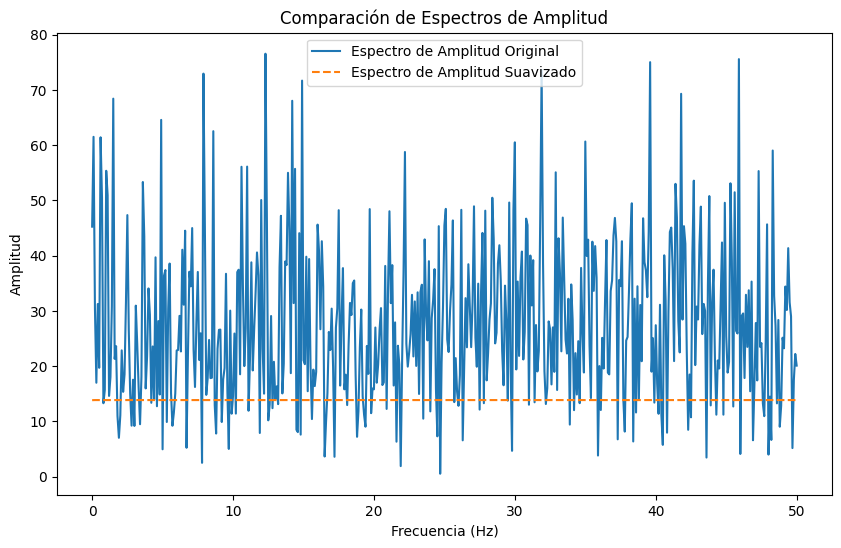

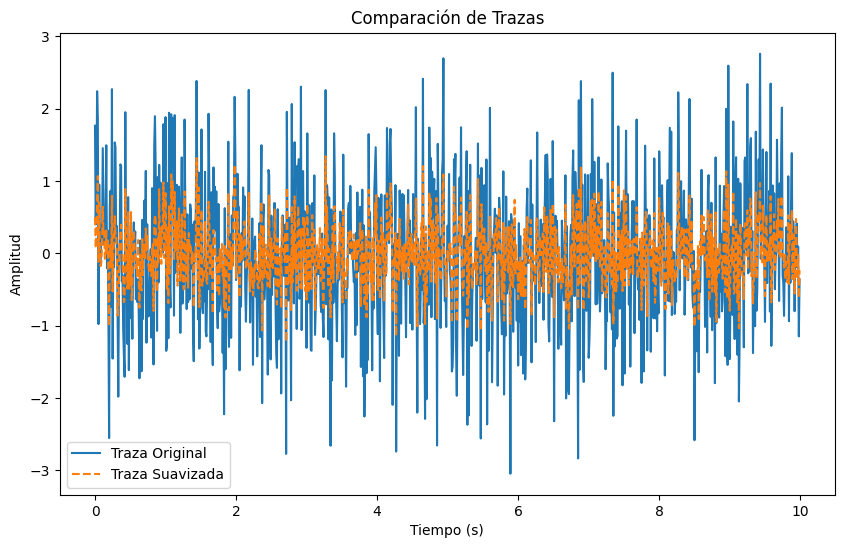

In [7]:
import numpy as np
from obspy import Trace, UTCDateTime

np.random.seed(0)
datos_aleatorios = np.random.normal(0, 1, 1000)

frecuencia_muestreo = 100
traza_aleatoria = Trace(data=datos_aleatorios)
traza_aleatoria.stats.sampling_rate = frecuencia_muestreo
traza_aleatoria.stats.starttime = UTCDateTime()

ventana_segundos = 10

traza_suavizada, frecuencias, espectro_amplitud, espectro_suavizado = suavizado_espectro(traza_aleatoria, ventana_segundos)

graficar_espectros(frecuencias, espectro_amplitud, espectro_suavizado)
graficar_trazas(traza_aleatoria, traza_suavizada)

## Aplicación de función a datos reales

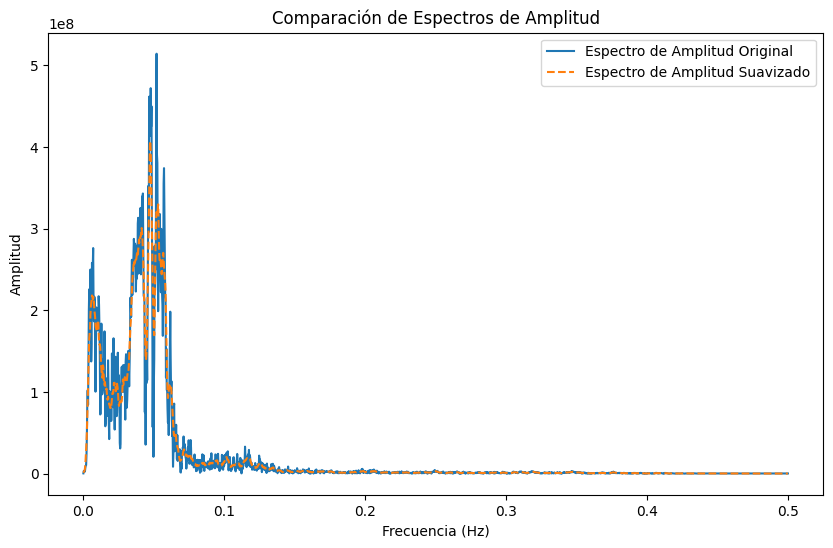

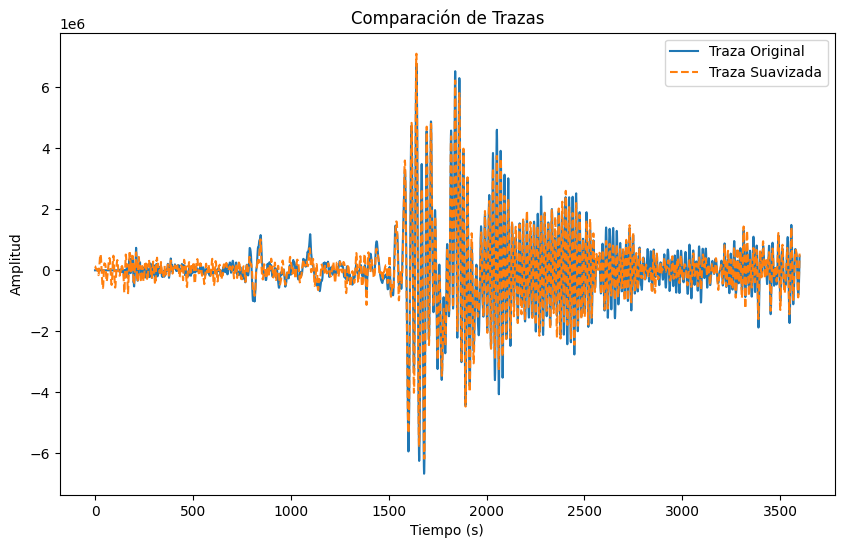

In [8]:
client = Client('IRIS')
t = UTCDateTime('2011-03-11T05:56:23')
st = client.get_waveforms("II", "PFO", "00", "LHZ", t, t + 60 * 60)

traza = st[0]

ventana_segundos = 10
traza_suavizada, frecuencias, espectro_amplitud, espectro_suavizado = suavizado_espectro(traza, ventana_segundos)

graficar_espectros(frecuencias, espectro_amplitud, espectro_suavizado)
graficar_trazas(traza, traza_suavizada)